In [15]:
import os, sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# path 설정
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))
print(sys.path[-1])

d:\base\boostcamp\apart\level2-competitiveds-recsys-06


In [16]:
raw_path: str = "../../data/raw"
processed_path: str = "../../data/processed"
submission_path: str = "../../data/submission"

df: pd.DataFrame = pd.read_csv(os.path.join(processed_path,"v4_baek+recent+rank.csv"))

In [3]:
df

,apt_idx,index,area_m2,contract_type,floor,built_year,latitude,longitude,age,deposit,...,nearest_high_school_within_1km,has_high_school_within_1km,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,interest_rate,diff_interest_rate
0,0,0,84.9981,2,9,2019,37.054314,127.045216,0,17000.0,...,1,True,717,40,1,1,0,0,1.85,-0.09
1,0,1,84.9981,2,20,2019,37.054314,127.045216,1,23000.0,...,1,True,717,40,1,1,0,0,1.85,-0.09
2,0,2,84.9981,2,8,2019,37.054314,127.045216,1,23000.0,...,1,True,717,40,1,1,0,0,1.85,-0.09
3,1,3,59.3400,2,1,1986,36.964647,127.055847,33,5000.0,...,1,True,3897,41,0,0,0,0,1.85,-0.09
4,2,4,59.8100,2,6,1995,36.972390,127.084514,24,1800.0,...,0,False,2039,41,0,0,0,0,1.85,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,17869,150167,115.5101,0,17,2010,37.528394,126.659398,14,NaN,...,2,True,1483,650,0,0,0,0,3.56,0.00
1951396,17869,150168,142.8738,0,4,2010,37.528394,126.659398,14,NaN,...,2,True,1483,650,0,0,0,0,3.56,0.00
1951397,17869,150169,142.8738,1,13,2010,37.528394,126.659398,14,NaN,...,2,True,1483,650,0,0,0,0,3.56,0.00
1951398,17869,150170,114.9285,1,2,2010,37.528394,126.659398,14,NaN,...,2,True,1483,650,0,0,0,0,3.56,0.00


In [3]:
# # df의 recent_deposit 열을 삭제
# df = df.drop(columns=['recent_deposit'], errors='ignore')

# # df2에서 필요한 열만 추출
# df2_subset = df2[['_type', 'original_index', 'recent_deposit']]

# # df와 df2를 _type과 index를 기준으로 병합
# df = df.merge(df2_subset, how='left', left_on=['_type', 'index'], right_on=['_type', 'original_index'])

# # 결과 확인
# df

,apt_idx,index,area_m2,contract_type,floor,built_year,latitude,longitude,age,deposit,...,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,interest_rate,diff_interest_rate,original_index,recent_deposit
0,0,0,84.9981,2,9,2019,37.054314,127.045216,0,17000.0,...,717,40,1,1,0,0,1.85,-0.09,0,NaN
1,0,1,84.9981,2,20,2019,37.054314,127.045216,1,23000.0,...,717,40,1,1,0,0,1.85,-0.09,1,17000.0
2,0,2,84.9981,2,8,2019,37.054314,127.045216,1,23000.0,...,717,40,1,1,0,0,1.85,-0.09,2,23000.0
3,1,3,59.3400,2,1,1986,36.964647,127.055847,33,5000.0,...,3897,41,0,0,0,0,1.85,-0.09,3,NaN
4,2,4,59.8100,2,6,1995,36.972390,127.084514,24,1800.0,...,2039,41,0,0,0,0,1.85,-0.09,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,17869,150167,115.5101,0,17,2010,37.528394,126.659398,14,NaN,...,1483,650,0,0,0,0,3.56,0.00,150167,37000.0
1951396,17869,150168,142.8738,0,4,2010,37.528394,126.659398,14,NaN,...,1483,650,0,0,0,0,3.56,0.00,150168,43000.0
1951397,17869,150169,142.8738,1,13,2010,37.528394,126.659398,14,NaN,...,1483,650,0,0,0,0,3.56,0.00,150169,43000.0
1951398,17869,150170,114.9285,1,2,2010,37.528394,126.659398,14,NaN,...,1483,650,0,0,0,0,3.56,0.00,150170,32500.0


In [3]:
pd.set_option('display.max_columns', None)
df[df['apt_idx']==15571]

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,area_price,area_m2_price,grid_id,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,nearest_elementary_school_distance,nearest_elementary_school_within_1km,has_elementary_school_within_1km,nearest_middle_school_distance,nearest_middle_school_within_1km,has_middle_school_within_1km,nearest_high_school_distance,nearest_high_school_within_1km,has_high_school_within_1km,nearest_park_distance,nearest_park_within_500.0m,has_park_within_500.0m,apt_deposit_rank,apt_area_deposit_rank,original_index,recent_deposit,interest_rate,diff_interest_rate
1260709,1260709,273.96,202111,12,0,14,2020,37.525956,127.054237,1,930000.0,train,15571,83.0,11204.819277,3394.656154,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1260709,NaN,1.55,0.26
1406833,1406833,273.96,202210,13,0,18,2020,37.525956,127.054237,2,1100000.0,train,15571,83.0,13253.012048,4015.184698,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1406833,930000.0,3.98,0.58
1539384,1539384,273.96,202304,20,1,2,2020,37.525956,127.054237,3,570000.0,train,15571,83.0,6867.469880,2080.595707,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1539384,1100000.0,3.44,-0.12
1542638,1542638,273.96,202307,7,2,14,2020,37.525956,127.054237,3,1000000.0,train,15571,83.0,12048.192771,3650.167908,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1542638,570000.0,3.69,-0.01


In [4]:
# from src.pre_process.feature_deposit_ranking import FeatureAptDepositRanking
# df = FeatureAptDepositRanking(df).get_data()

In [4]:
df.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id', 'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 'original_index',
       'recent_deposit', 'interest_rate', 'diff_interest_rate']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951400 entries, 0 to 1951399
Data columns (total 41 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   index                                 int64  
 1   area_m2                               float64
 2   contract_year_month                   int64  
 3   contract_day                          int64  
 4   contract_type                         int64  
 5   floor                                 int64  
 6   built_year                            int64  
 7   latitude                              float64
 8   longitude                             float64
 9   age                                   int64  
 10  deposit                               float64
 11  _type                                 object 
 12  apt_idx                               int64  
 13  area                                  float64
 14  area_price                            float64
 15  area_m2_price  

In [17]:
columns_to_drop = ['area_m2_price', 'area_price', 'year_month', 'contract_ymd', 'original_index', 'interest_rate', 'diff_interest_rate']
df = df.drop(columns=columns_to_drop, errors='ignore')

temp_train_df = df[df["_type"]=='train']
test_df = df[df["_type"]=='test']

In [8]:
test_df

,index,area_m2,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,grid_id,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,nearest_elementary_school_distance,nearest_elementary_school_within_1km,has_elementary_school_within_1km,nearest_middle_school_distance,nearest_middle_school_within_1km,has_middle_school_within_1km,nearest_high_school_distance,nearest_high_school_within_1km,has_high_school_within_1km,nearest_park_distance,nearest_park_within_500.0m,has_park_within_500.0m,apt_deposit_rank,apt_area_deposit_rank,recent_deposit,interest_rate,diff_interest_rate
1801228,0,84.9610,12,1,14,2016,36.965423,127.048779,8,NaN,test,3,25.7,18375.213675,4284,41,0,0,0,0,779.057020,2,1,1313.939174,0,0,1264.233325,0,0,288.442840,3,1,11986,43736,22000.0,3.54,-0.05
1801229,1,59.9000,13,0,4,1997,36.963105,127.040678,27,NaN,test,5,18.2,18375.213675,5004,41,0,0,0,0,1448.494091,0,0,1993.687248,0,0,1935.194795,0,0,153.733042,5,1,18164,58231,7900.0,3.54,-0.05
1801230,2,39.2700,29,0,5,1990,36.957089,127.047449,34,NaN,test,4,11.9,4635.616438,5021,41,0,0,0,0,808.416163,1,1,1514.929390,0,0,1448.063620,0,0,272.286038,2,1,18382,59031,6300.0,3.54,-0.05
1801231,3,39.2700,3,0,1,1990,36.957089,127.047449,34,NaN,test,4,11.9,4635.616438,5021,41,0,0,0,0,808.416163,1,1,1514.929390,0,0,1448.063620,0,0,272.286038,2,1,18382,59031,6300.0,3.56,0.02
1801232,4,46.9800,2,0,4,1990,36.957089,127.047449,34,NaN,test,4,14.2,4635.616438,5021,41,0,0,0,0,808.416163,1,1,1514.929390,0,0,1448.063620,0,0,272.286038,2,1,18382,58861,5500.0,3.56,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,150167,115.5101,27,0,17,2010,37.528394,126.659398,14,NaN,test,17869,35.0,33310.656662,1483,650,0,0,0,0,313.128782,2,1,482.435625,3,1,224.754177,2,1,398.113485,1,1,6088,25360,37000.0,3.62,-0.04
1951396,150168,142.8738,2,0,4,2010,37.528394,126.659398,14,NaN,test,17869,43.3,33310.656662,1483,650,0,0,0,0,313.128782,2,1,482.435625,3,1,224.754177,2,1,398.113485,1,1,6088,17911,43000.0,3.59,-0.03
1951397,150169,142.8738,16,1,13,2010,37.528394,126.659398,14,NaN,test,17869,43.3,33310.656662,1483,650,0,0,0,0,313.128782,2,1,482.435625,3,1,224.754177,2,1,398.113485,1,1,6088,17911,43000.0,3.59,-0.03
1951398,150170,114.9285,22,1,2,2010,37.528394,126.659398,14,NaN,test,17869,34.8,33310.656662,1483,650,0,0,0,0,313.128782,2,1,482.435625,3,1,224.754177,2,1,398.113485,1,1,6088,24128,32500.0,3.59,-0.03


In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 학습에 사용할 특징 열
feature_columns = [col for col in temp_train_df.columns if col not in ['deposit', '_type', 'index']]

# 학습 및 테스트 데이터 준비
X_train = temp_train_df[feature_columns]
y_train = temp_train_df['deposit']
X_test = test_df[feature_columns]


# 학습 데이터를 검증용으로 분할
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# XGBoost를 위한 DMatrix 생성
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)
dtest = xgb.DMatrix(X_test)

# XGBoost 파라미터 설정
params = {
    'objective': 'reg:absoluteerror',
    'eval_metric': 'mae',
    'max_depth': 6,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# 모델 학습
evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=500, early_stopping_rounds=50, evals=evals, verbose_eval=10)

# 테스트 세트에 대한 예측
y_pred = model.predict(dtest)

[0]	train-mae:16485.83399	eval-mae:16487.52184
[10]	train-mae:11289.45232	eval-mae:11289.60070
[20]	train-mae:8213.07734	eval-mae:8207.50405
[30]	train-mae:6439.55742	eval-mae:6426.88016
[40]	train-mae:5514.72618	eval-mae:5499.32615
[50]	train-mae:5057.42087	eval-mae:5042.85050
[60]	train-mae:4835.99519	eval-mae:4823.06097
[70]	train-mae:4727.42511	eval-mae:4716.36335
[80]	train-mae:4674.15467	eval-mae:4664.97530
[90]	train-mae:4646.33588	eval-mae:4638.35262
[100]	train-mae:4628.48675	eval-mae:4621.38373
[110]	train-mae:4615.00993	eval-mae:4608.29305
[120]	train-mae:4601.97090	eval-mae:4595.67231
[130]	train-mae:4589.64885	eval-mae:4583.61985
[140]	train-mae:4574.23627	eval-mae:4568.47118
[150]	train-mae:4566.25012	eval-mae:4560.90952
[160]	train-mae:4555.08027	eval-mae:4550.02702
[170]	train-mae:4549.00152	eval-mae:4544.19017
[180]	train-mae:4539.78694	eval-mae:4535.05379
[190]	train-mae:4531.41402	eval-mae:4526.91549
[200]	train-mae:4524.81184	eval-mae:4520.35203
[210]	train-mae:4518

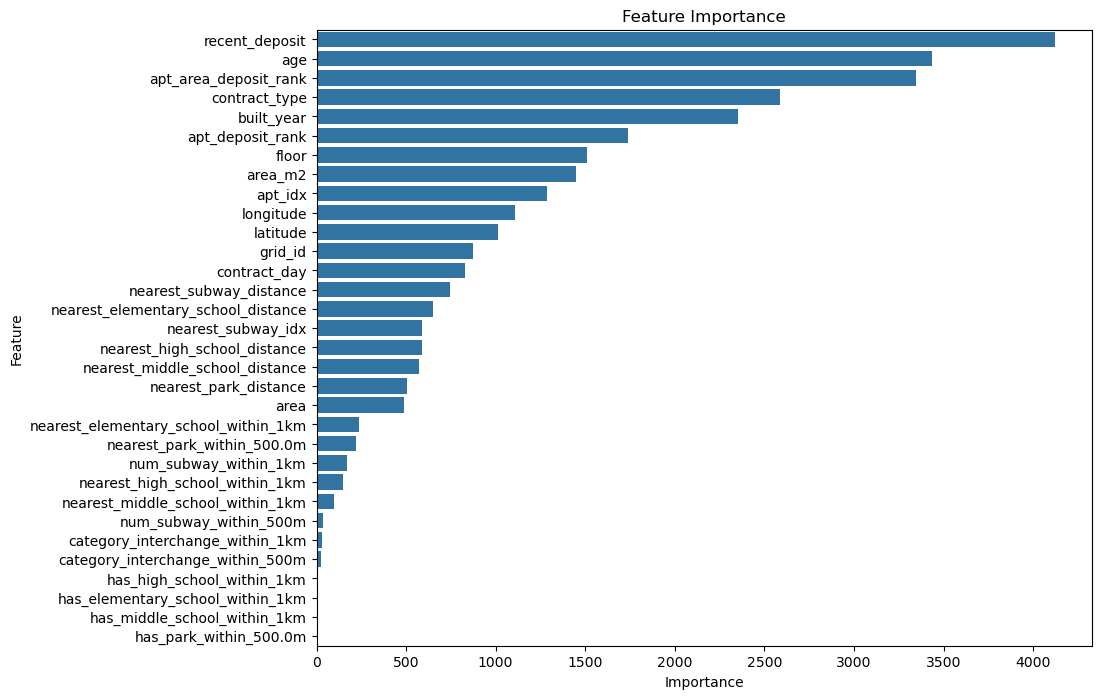

In [19]:
# 피처 중요도 추출
feature_importance = model.get_fscore()

# 피처 중요도를 DataFrame으로 변환
importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [20]:
y_pred

array([20885.836 ,  6952.2036,  6704.158 , ..., 42990.395 , 35189.1   ,
       36658.89  ], dtype=float32)

In [21]:
# Create a DataFrame from y_pred with the same index as X_test
y_pred_df = pd.DataFrame(y_pred, index=range(len(y_pred)), columns=['deposit'])

# Display the DataFrame
y_pred_df

,deposit
0,20885.835938
1,6952.203613
2,6704.158203
3,6794.669434
4,7013.232422
...,...
150167,37620.242188
150168,44307.640625
150169,42990.394531
150170,35189.101562


In [22]:
y_pred_df.index.name = 'index'
y_pred_df

,deposit
index,
0,20885.835938
1,6952.203613
2,6704.158203
3,6794.669434
4,7013.232422
...,...
150167,37620.242188
150168,44307.640625
150169,42990.394531


In [24]:
submission_path: str = "../../data/submission"
y_pred_df.to_csv(os.path.join(submission_path, "v4_xgboost_2(delete_interest).csv"), index=True)

In [23]:
# Calculate the mean of the 'deposit' column
mean_deposit = y_pred_df['deposit'].mean()

# Print the mean deposit
print(f"Mean deposit: {mean_deposit}")

Mean deposit: 38133.37890625


In [13]:
mean_y_pred_deposit = y_pred_df['deposit'].mean()
print(f"Mean deposit in y_pred_df: {mean_y_pred_deposit}")

Mean deposit in y_pred_df: 37287.578125


In [14]:
from sklearn.metrics import mean_absolute_error

# 두 값의 차이 계산
mae_difference = mean_absolute_error([mean_deposit], [mean_y_pred_deposit])
print(f"MAE Difference: {mae_difference}")

MAE Difference: 2109.2073695932413
